## Double Quantum Dot

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
from scipy.integrate import quad
import matplotlib.cm as cm

In [2]:
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (6, 4)
plt.rcParams["font.family"] = "serif"
plt.rcParams["axes.labelsize"] = 10
plt.rcParams["axes.titlesize"] = 10
plt.rcParams["legend.fontsize"] = 9
plt.rcParams["xtick.labelsize"] = 9
plt.rcParams["ytick.labelsize"] = 9
plt.rcParams["lines.linewidth"] = 1.2
plt.rcParams["axes.linewidth"] = 1
set_matplotlib_formats('retina')

C:\Users\Paula\AppData\Local\Temp\ipykernel_25272\848395888.py:11: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


#### Constants used

In [3]:
e = 1.0 
h = 1.0  
k_B = 1.0 
E0 = 0.0 
T = 1.0
dT = 0.0      
T_L = T + dT/2
T_R = T - dT/2
mu_L = lambda V: e * V / 2
mu_R = lambda V: -e * V / 2

#### Auxiliar functions

In [4]:
def T_E(E, E0, Gamma, tau):
    num =  Gamma**2 * tau**2
    denom = ((E-E0)**2 - Gamma**2/4 - tau**2)**2 +  Gamma**2 * (E - E0)**2
    return num / denom

def f_FD(E, mu, T):
    return 1 / (1 + np.exp((E - mu) / (k_B * T)))

#### Transmission function

C:\Users\Paula\AppData\Local\Temp\ipykernel_25272\2657397277.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colorin = cm.get_cmap('GnBu', 5)


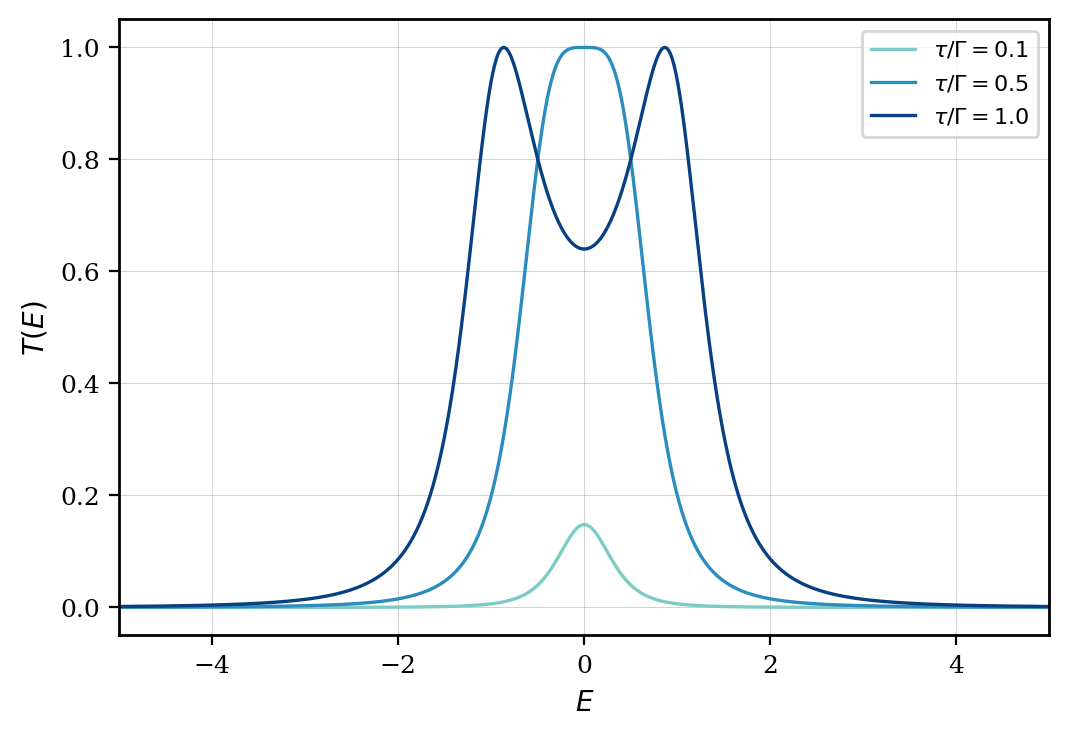

In [ ]:
Gamma = 1
tau_vals = [0.1, 0.5, 1.0]
E_range = np.linspace(-5, 5, 1000)
colorin = cm.get_cmap('GnBu', 5)
colors= [colorin(i+2) for i in range(3)]

for tau, color in zip(tau_vals, colors):
    T_E_vals = T_E(E_range, E0, Gamma, tau)
    plt.plot(E_range, T_E_vals, label=f"$\\tau/\\Gamma = {tau}$", color=color, linewidth=1.2)

plt.xlabel("$E$")
plt.ylabel("$T(E)$")
plt.legend(loc="best", fontsize=8)
plt.grid(linewidth=0.2)
plt.xlim(-5, 5)
plt.show()


#### Charge and heat current

In [6]:
def I(mu_L, mu_R, T_L, T_R, Gamma, E0, tau):
    integrand = lambda E: T_E(E, E0, Gamma, tau) * (f_FD(E, mu_L, T_L) - f_FD(E, mu_R, T_R))
    return (e / (2*np.pi*h)) * quad(integrand, -np.inf, np.inf)[0]

def I_L(mu_L, mu_R, T_L, T_R, Gamma, E0, tau):
    integrand = lambda E: -T_E(E, E0, Gamma, tau) * (f_FD(E, mu_L, T_L) - f_FD(E, mu_R, T_R))
    return (e / (2*np.pi*h)) * quad(integrand, -np.inf, np.inf)[0]

In [7]:
def J_L(mu_L, mu_R, T_L, T_R, Gamma, E0, tau):
    integrand = lambda E: T_E(E, E0, Gamma, tau) *  (f_FD(E, mu_L, T_L) - f_FD(E, mu_R, T_R)) * (E - mu_L)
    return (e / (2*np.pi*h)) * quad(integrand, -np.inf, np.inf)[0]

# Current from the right contact J_R
def J_R(mu_L, mu_R, T_L, T_R, Gamma, E0, tau):
    integrand = lambda E: - T_E(E, E0, Gamma, tau) * (f_FD(E, mu_L, T_L) - f_FD(E, mu_R, T_R)) * (E - mu_R)
    return (e / (2*np.pi*h)) * quad(integrand, -np.inf, np.inf)[0]

C:\Users\Paula\AppData\Local\Temp\ipykernel_25272\237242380.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colorin = cm.get_cmap('GnBu', 5)
C:\Users\Paula\AppData\Local\Temp\ipykernel_25272\4288337719.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp((E - mu) / (k_B * T)))


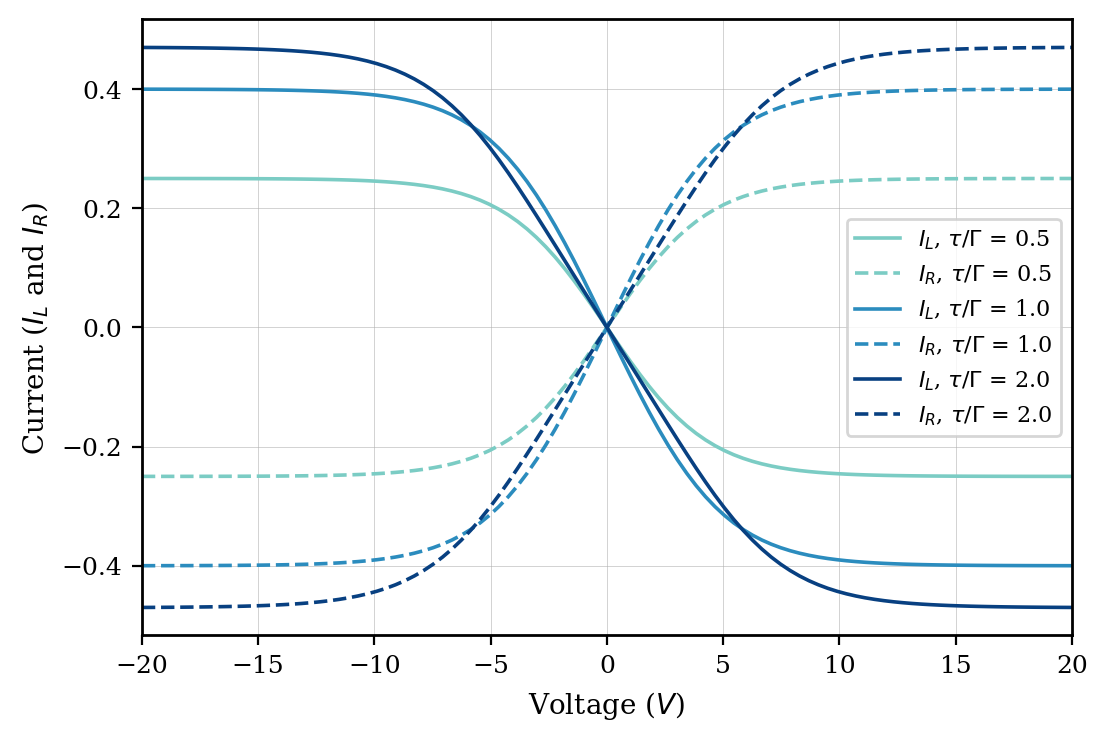

In [ ]:
# Charge current
Gamma_vals = [1] 
tau_vals = [0.5, 1.0, 2.0]
colorin = cm.get_cmap('GnBu', 5)
colors= [colorin(i+2) for i in range(3)]

for Gamma in Gamma_vals:
    V_range = np.linspace(-20,20, 100) 
    for j, tau in enumerate(tau_vals):
        IL = [I_L(mu_L(V), mu_R(V), T_L, T_R, Gamma, E0, tau) for V in V_range]
        IR = [I(mu_L(V), mu_R(V), T_L, T_R, Gamma, E0, tau) for V in V_range]
        plt.plot(V_range, IL, color=colors[j], label=f"$I_L$, $\\tau/\\Gamma$ = {tau/Gamma:.1f}", linewidth=1.3)
        plt.plot(V_range, IR, color=colors[j], label=f"$I_R$, $\\tau/\\Gamma$ = {tau/Gamma:.1f}", linewidth=1.3, linestyle='--')

plt.xlabel("Voltage ($V$)")
plt.ylabel("Current ($I_L$ and $I_R$)")
plt.legend(loc="best", fontsize=8)
plt.grid(linewidth=0.2)
plt.xlim(-20, 20)
plt.show()

C:\Users\Paula\AppData\Local\Temp\ipykernel_25272\1211191493.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colorin = cm.get_cmap('GnBu', 5)
C:\Users\Paula\AppData\Local\Temp\ipykernel_25272\4288337719.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp((E - mu) / (k_B * T)))


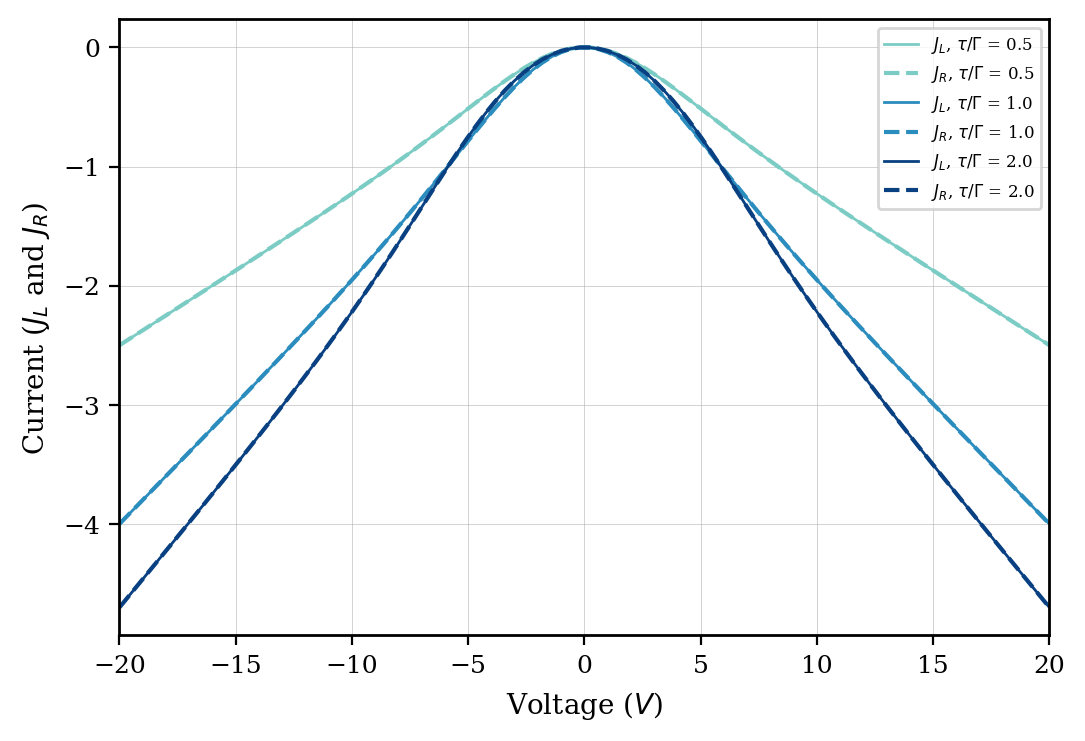

In [ ]:
# Heat currents
Gamma_vals = [1]
tau_vals = [0.5, 1.0, 2.0]
colorin = cm.get_cmap('GnBu', 5)
colors = [colorin(i+2) for i in range(3)]

for Gamma in Gamma_vals:
    for j, tau in enumerate(tau_vals):
        JL = [J_L(mu_L(V), mu_R(V), T_L, T_R, Gamma, E0, tau) for V in V_range]
        JR = [J_R(mu_L(V), mu_R(V), T_L, T_R, Gamma, E0, tau) for V in V_range]
        plt.plot(V_range, JL, color=colors[j], label=f"$J_L$, $\\tau/\\Gamma$ = {tau/Gamma:.1f}", linewidth=1)
        plt.plot(V_range, JR, color=colors[j], linestyle='--', label=f"$J_R$, $\\tau/\\Gamma$ = {tau/Gamma:.1f}", linewidth=1.5)

plt.xlabel("Voltage ($V$)")
plt.ylabel("Current ($J_L$ and $J_R$)")
plt.legend(loc="best", fontsize=6)
plt.grid(linewidth=0.2)
plt.xlim(V_range[0], V_range[-1])
plt.show()

#### Noise (S) :

In [ ]:
def noise(mu_L, mu_R, T_L, T_R, Gamma, E0, tau):
    integrand = lambda E: T_E(E, E0, Gamma, tau) * (f_FD(E, mu_L, T_L) * (1 - f_FD(E, mu_L, T_L)) + f_FD(E, mu_R, T_R) * (1 - f_FD(E, mu_R, T_R))) + T_E(E, E0, Gamma, tau) * (1 - T_E(E, E0, Gamma, tau)) * (f_FD(E, mu_L, T_L) - f_FD(E, mu_R, T_R))**2
    return (e / (2*np.pi*h)) * quad(integrand, -np.inf, np.inf)[0]

##### Contributions of the noise: shot and thermal noise

In [ ]:

def shot(mu_L, mu_R, T_L, T_R, Gamma, E0, tau):
    integrand = lambda E: T_E(E, E0, Gamma, tau) * (f_FD(E, mu_L, T_L) * (1 - f_FD(E, mu_L, T_L)) + f_FD(E, mu_R, T_R) * (1 - f_FD(E, mu_R, T_R))) 
    return (e / (2*np.pi*h)) * quad(integrand, -np.inf, np.inf)[0]
 
def thermal(mu_L, mu_R, T_L, T_R, Gamma, E0, tau):
    integrand = lambda E: T_E(E, E0, Gamma, tau) * (1 - T_E(E, E0, Gamma, tau)) * (f_FD(E, mu_L, T_L) - f_FD(E, mu_R, T_R))**2
    return (e / (2*np.pi*h)) * quad(integrand, -np.inf, np.inf)[0]

C:\Users\Paula\AppData\Local\Temp\ipykernel_25272\4288337719.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp((E - mu) / (k_B * T)))
C:\Users\Paula\AppData\Local\Temp\ipykernel_25272\2537827650.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colorin = cm.get_cmap('GnBu', 5)


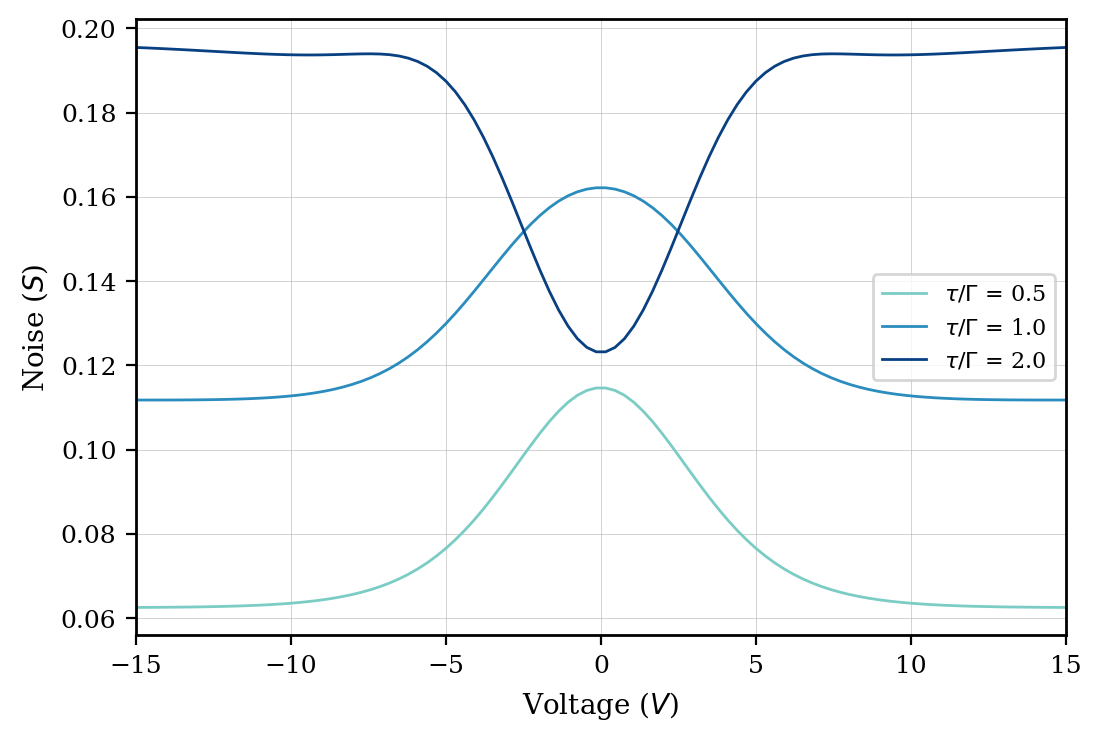

In [13]:
# Plot noise
Gamma_vals = [1] 
tau_vals = [0.5, 1.0, 2.0]

for Gamma in Gamma_vals:
    V_range = np.linspace(-15, 15, 100) 
    for j, tau in enumerate(tau_vals):
        noise_vals = [noise(mu_L(V), mu_R(V), T_L, T_R, Gamma, E0, tau) for V in V_range]
        plt.plot(V_range, noise_vals, color=colors[j], label=f"$\\tau/\\Gamma$ = {tau/Gamma:.1f}", linewidth=1)

colorin = cm.get_cmap('GnBu', 5)
colors= [colorin(i+2) for i in range(3)]

plt.xlabel("Voltage ($V$)")
plt.ylabel("Noise ($S$)")
plt.legend(loc="best", fontsize=8)
plt.grid(linewidth=0.2)
plt.xlim(-15, 15)
plt.show()

In [1]:
# shot and thermal noise
Gamma_vals = [1]
tau_vals = [0.5, 1.0, 2.0]
colorin = cm.get_cmap('GnBu', 5)
colors = [colorin(i+2) for i in range(3)]

for Gamma in Gamma_vals:
    V_range = np.linspace(-15, 15, 100)
    for j, tau in enumerate(tau_vals):
        shot_vals = [shot(mu_L(V), mu_R(V), T_L, T_R, Gamma, E0, tau) for V in V_range]
        noise_vals = [noise(mu_L(V), mu_R(V), T_L, T_R, Gamma, E0, tau) for V in V_range]
        plt.plot(V_range, shot_vals, color=colors[j], linestyle='-', label=f"Shot noise, $\\tau/\\Gamma$ = {tau/Gamma:.1f}", linewidth=1)
        plt.plot(V_range, noise_vals, color=colors[j], linestyle='--', label=f"Thermal noise, $\\tau/\\Gamma$ = {tau/Gamma:.1f}", linewidth=1.2)

plt.xlabel("Voltage ($V$)")
plt.ylabel("Component value")
plt.legend(loc="best", fontsize=6)
plt.grid(linewidth=0.2)
plt.xlim(-15, 15)
plt.show()

NameError: name 'cm' is not defined

## TUR factor

<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Paula\AppData\Local\Temp\ipykernel_25272\3576005857.py:20: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mathcal{F}$/$V^2$")
C:\Users\Paula\AppData\Local\Temp\ipykernel_25272\4288337719.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp((E - mu) / (k_B * T)))
C:\Users\Paula\AppData\Local\Temp\ipykernel_25272\3576005857.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colorin = cm.get_cmap('GnBu', 4)


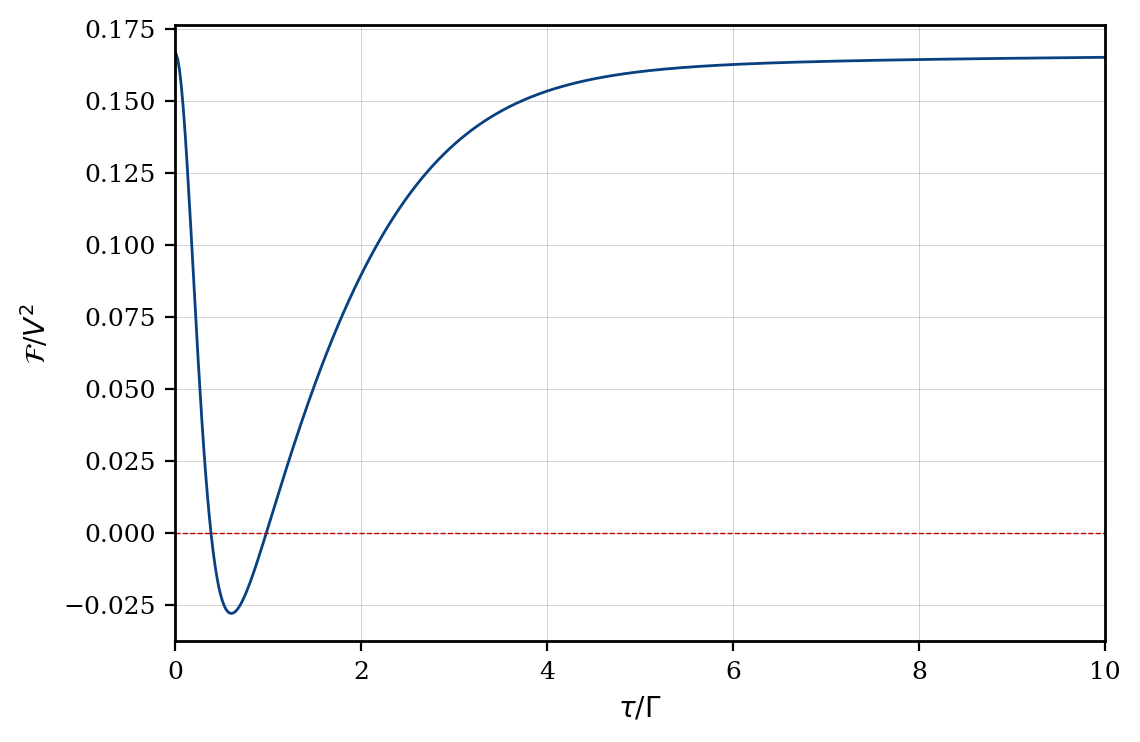

In [15]:
V_fixed = 0.1
tau_vals = np.linspace(0.01, 10, 500)

# Calcular FTUR para diferentes valores de tau/Gamma
FTUR_tau_vals = []

for tau in tau_vals:
    I_val = I(mu_L(V_fixed), mu_R(V_fixed), T_L, T_R, Gamma, E0, tau)
    noise_val = noise(mu_L(V_fixed), mu_R(V_fixed), T_L, T_L, Gamma, E0, tau)
    FTUR_val = (V_fixed * noise_val) / (I_val * k_B * T_L) - 2
    FTUR_tau_vals.append(FTUR_val)

colorin = cm.get_cmap('GnBu', 4)
colors= colorin(3) 

# Graficar FTUR en función de tau/Gamma
plt.plot(tau_vals, np.array(FTUR_tau_vals)/V_fixed**2 , color=colors, linewidth=1)
plt.axhline(y=0, color='#BF0000', linestyle='--', linewidth=0.5)
plt.xlabel("$\\tau/\\Gamma$")
plt.ylabel("$\mathcal{F}$/$V^2$")
plt.xlim(0, 10)
plt.grid(linewidth=0.2)
plt.show()

##### Approximation

<>:46: SyntaxWarning: invalid escape sequence '\m'
<>:46: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Paula\AppData\Local\Temp\ipykernel_25272\2723533160.py:46: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mathcal{F}$/$V^2$")
C:\Users\Paula\AppData\Local\Temp\ipykernel_25272\4288337719.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp((E - mu) / (k_B * T)))
C:\Users\Paula\AppData\Local\Temp\ipykernel_25272\2723533160.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colorin = cm.get_cmap('GnBu', 4)


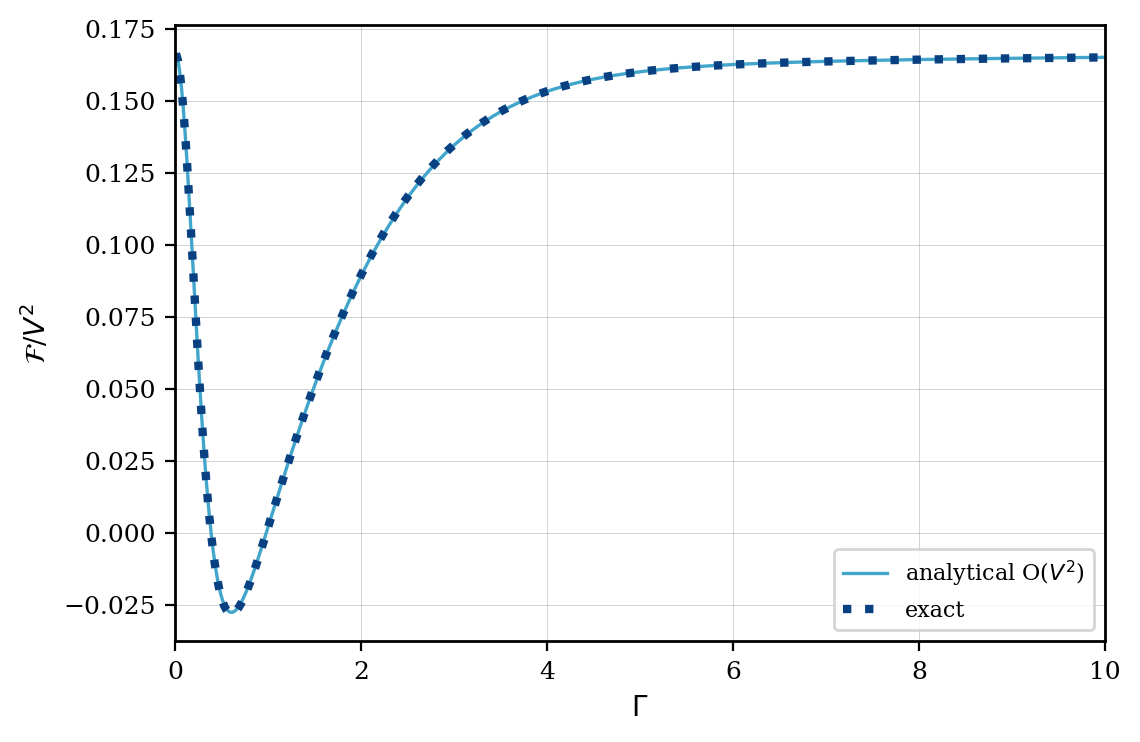

In [16]:
def aprox(T, Gamma, E0, V, tau):
    # Constante beta
    beta = 1 / (k_B * T)

    # Definir Cneq
    def integrand_Cneq(E):
        T_E_val = T_E(E, E0, Gamma, tau)
        f_val = f_FD(E, V, T)
        return (beta**2 / 6) * T_E_val * f_val * (1 - f_val) * (1 - 6 * T_E_val * f_val * (1 - f_val))
    
    Cneq = quad(integrand_Cneq, -np.inf, np.inf)[0] / (h)
    
    # Definir G1
    def integrand_G1(E):
        T_E_val = T_E(E, E0, Gamma, tau)
        f_val = f_FD(E, V, T)
        return T_E_val * (f_val * (1 - f_val))
    
    G1 = quad(integrand_G1, -np.inf, np.inf)[0] / h
    
    # Retornar la aproximación
    if G1 != 0:
        return Cneq / G1
    else:
        return np.inf  # Avoid division by zero

Gamma = 1.0
V_fixed = 0.1
tau_val = np.linspace(0.01, 10, 500)
F_TUR_APROX = [aprox(T, Gamma, E0, V_fixed, tau) for tau in tau_val]

F_vals = []
for tau in tau_val:
    I_val = I(mu_L(V_fixed), mu_R(V_fixed), T_L, T_R, Gamma, E0, tau)
    noise_val = noise(mu_L(V_fixed), mu_R(V_fixed), T_L, T_L, Gamma, E0, tau)
    FTUR_val = (V_fixed * noise_val) / (I_val * k_B * T_L) - 2
    F_vals.append(FTUR_val)  # Append to F_vals instead of FTUR_tau_vals

colorin = cm.get_cmap('GnBu', 4)

plt.plot(tau_val, np.array(F_TUR_APROX), color=colorin(2), label="analytical O($V^2$)", linestyle='-')
plt.plot(tau_val, np.array(F_vals)/V_fixed**2 , color=colorin(4), label="exact", linestyle=':', linewidth=3)

# Configuración del gráfico
plt.xlabel("$\\Gamma$")
plt.ylabel("$\mathcal{F}$/$V^2$")
plt.legend(loc='lower right', fontsize=8)
plt.grid(linewidth=0.2)
plt.xlim(0, 10)
plt.show()

In [ ]:
V_vals = np.linspace(-10, 10, 100)
tau_gamma_ratios = np.linspace(0.1, 8, 100)
FTUR_matrix = np.zeros((len(tau_gamma_ratios), len(V_vals)))
plt.figure(figsize=(7, 4))
for i, tau in enumerate(tau_gamma_ratios):
    for j, V in enumerate(V_vals):
        I_val = I(mu_L(V), mu_R(V), T_L, T_R, Gamma, E0, tau)
        noise_val = noise(mu_L(V), mu_R(V), T_L, T_R, Gamma, E0, tau)
        FTUR_matrix[i, j] = (V * noise_val) / (I_val * k_B * T_L) - 2

plt.pcolormesh(V_vals, tau_gamma_ratios, FTUR_matrix, shading='auto', cmap='GnBu')
plt.colorbar(label='$\mathcal{F}$')
contour = plt.contour(V_vals, tau_gamma_ratios, FTUR_matrix, levels=[0], colors='black', linewidths=1.5)
plt.clabel(contour, fmt='$\mathcal{F}$=0', inline=True, fontsize=8)

plt.xlabel('Voltage ($V$)')
plt.ylabel('$\\tau/\\Gamma$')
plt.show()

##### WITH TEMPERATURE GRADIENT

In [ ]:
F_vals = []
V_fixed = 1
tau_vals = np.linspace(0.1, 5, 500)

for tau in tau_vals:
    J_val_L = J_L(mu_L(V_fixed), mu_R(V_fixed), T_L, T_R, Gamma, E0, tau)
    J_val_R = J_R(mu_L(V_fixed), mu_R(V_fixed), T_L, T_R, Gamma, E0, tau)
    I_val_L = I(mu_L(V_fixed), mu_R(V_fixed), T_L, T_R, Gamma, E0, tau)
    noise_val = noise(mu_L(V_fixed), mu_R(V_fixed), T_L, T_R, Gamma, E0, tau)
    
    F = -(noise_val * (J_val_L / T_L + J_val_R / T_R)) / (I_val_L**2 * k_B) - 2
    F_vals.append(F)

plt.plot(tau_vals, F_vals, color='k', linewidth=1)
plt.axhline(y=0, color='red', linestyle='--', linewidth=0.5)
plt.xlabel("$\\tau$")
plt.ylabel("F")
plt.title("TUR factor vs $\\tau$ for T= {} and dT ={}".format(T, dT/2))
plt.grid(linewidth=0.2)
plt.show()

In [ ]:
E0_vals = np.linspace(-20, 20, 50)
tau_gamma_ratios = np.linspace(0.1, 20, 50)
FTUR_matrix = np.zeros((len(tau_gamma_ratios), len(E0_vals)))

for i, tau in enumerate(tau_gamma_ratios):
    for j, E0 in enumerate(E0_vals):
        I_val = I(mu_L(V_fixed), mu_R(V_fixed), T_L, T_R, Gamma, E0, tau)
        noise_val = noise(mu_L(V_fixed), mu_R(V_fixed), T_L, T_R, Gamma, E0, tau)
        FTUR_matrix[i, j] = -(noise_val * (J_val_L / T_L + J_val_R / T_R)) / (I_val_L**2 * k_B) - 2

# Crear el colormap
plt.pcolormesh(E0_vals, tau_gamma_ratios, FTUR_matrix, shading='auto', cmap='coolwarm')
plt.colorbar(label='FTUR')

# Agregar una línea de contorno para FTUR=0
contour = plt.contour(E0_vals, tau_gamma_ratios, FTUR_matrix, levels=[0], colors='black', linewidths=1.5)
plt.clabel(contour, fmt='FTUR=0', inline=True, fontsize=8)

plt.xlabel('$E_0$')
plt.ylabel('$\\tau/\\Gamma$')
plt.title('FTUR vs $E_0$ and $\\tau/\\Gamma$')
plt.show()

In [ ]:
V_vals = np.linspace(-20, 20, 50)
tau_vals = np.linspace(0.1, 20, 50)
FTUR_matrix = np.zeros((len(tau_vals), len(V_vals)))

for i, tau in enumerate(tau_vals):
    for j, V in enumerate(V_vals):
        I_val = I(mu_L(V), mu_R(V), T_L, T_R, Gamma, E0, tau)
        noise_val = noise(mu_L(V), mu_R(V), T_L, T_R, Gamma, E0, tau)
        FTUR_matrix[i, j] = -(noise_val * (J_val_L / T_L + J_val_R / T_R)) / (I_val_L**2 * k_B) - 2

# Crear el colormap
plt.pcolormesh(V_vals, tau_vals, FTUR_matrix, shading='auto', cmap='coolwarm')
plt.colorbar(label='FTUR')

# Agregar una línea de contorno para FTUR=0
contour = plt.contour(V_vals, tau_vals, FTUR_matrix, levels=[0], colors='black', linewidths=1.5)
plt.clabel(contour, fmt='FTUR=0', inline=True, fontsize=8)

plt.xlabel('$V$')
plt.ylabel('$\\tau$')
plt.title('FTUR vs $V$ and $\\tau$')
plt.show()

### Quantum uncertainty relation

C:\Users\Paula\AppData\Local\Temp\ipykernel_25272\4288337719.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp((E - mu) / (k_B * T)))
C:\Users\Paula\AppData\Local\Temp\ipykernel_25272\3002529692.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colorin = cm.get_cmap('GnBu', 4)


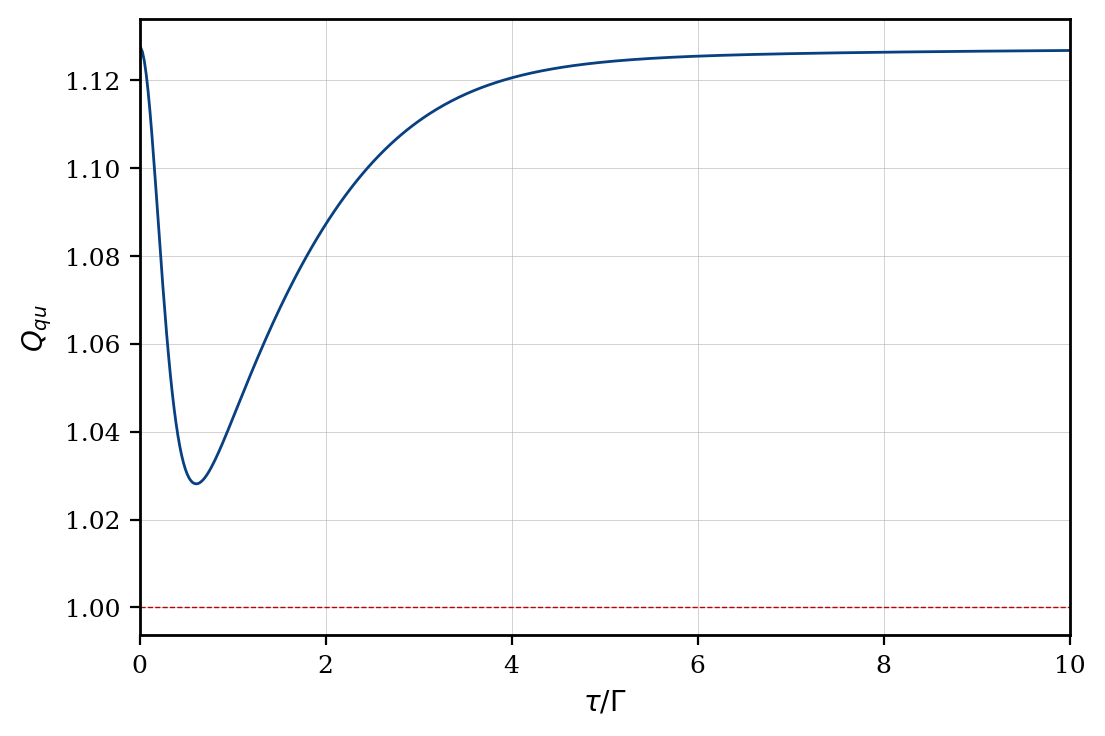

In [21]:
V_fixed = 1
tau_vals = np.linspace(0.01, 10, 500)

# Calcular FTUR para diferentes valores de tau/Gamma
FTUR_tau_vals = []

for tau in tau_vals:
    I_val = I(mu_L(V_fixed), mu_R(V_fixed), T_L, T_R, Gamma, E0, tau)
    noise_val = noise(mu_L(V_fixed), mu_R(V_fixed), T_L, T_L, Gamma, E0, tau)
    J_val_L = J_L(mu_L(V_fixed), mu_R(V_fixed), T_L, T_R, Gamma, E0, tau)
    J_val_R = J_R(mu_L(V_fixed), mu_R(V_fixed), T_L, T_R, Gamma, E0, tau)
    sigma = -(J_val_L / T_L + J_val_R / T_R)
    FTUR_val = noise_val/I_val * np.sinh(sigma/(2*k_B*I_val))
    FTUR_tau_vals.append(FTUR_val)

colorin = cm.get_cmap('GnBu', 4)
colors= colorin(3) 

# Graficar FTUR en función de tau/Gamma
plt.plot(tau_vals, np.array(FTUR_tau_vals)/V_fixed**2 , color=colors, linewidth=1)
plt.axhline(y=1, color='#BF0000', linestyle='--', linewidth=0.5)
plt.xlabel("$\\tau/\\Gamma$")
plt.ylabel("$Q_{qu}$")
plt.xlim(0, 10)
plt.grid(linewidth=0.2)
plt.show()

### Comparation quantum and classical uncertainty relations

<>:26: SyntaxWarning: invalid escape sequence '\m'
<>:26: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Paula\AppData\Local\Temp\ipykernel_25272\3258356941.py:26: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(tau_vals, np.array(F_V), color=colors, linewidth=1, linestyle='--', label="$\mathcal{F}$")
C:\Users\Paula\AppData\Local\Temp\ipykernel_25272\4288337719.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp((E - mu) / (k_B * T)))
C:\Users\Paula\AppData\Local\Temp\ipykernel_25272\3258356941.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colorin = cm.get_cmap('GnBu', 4)


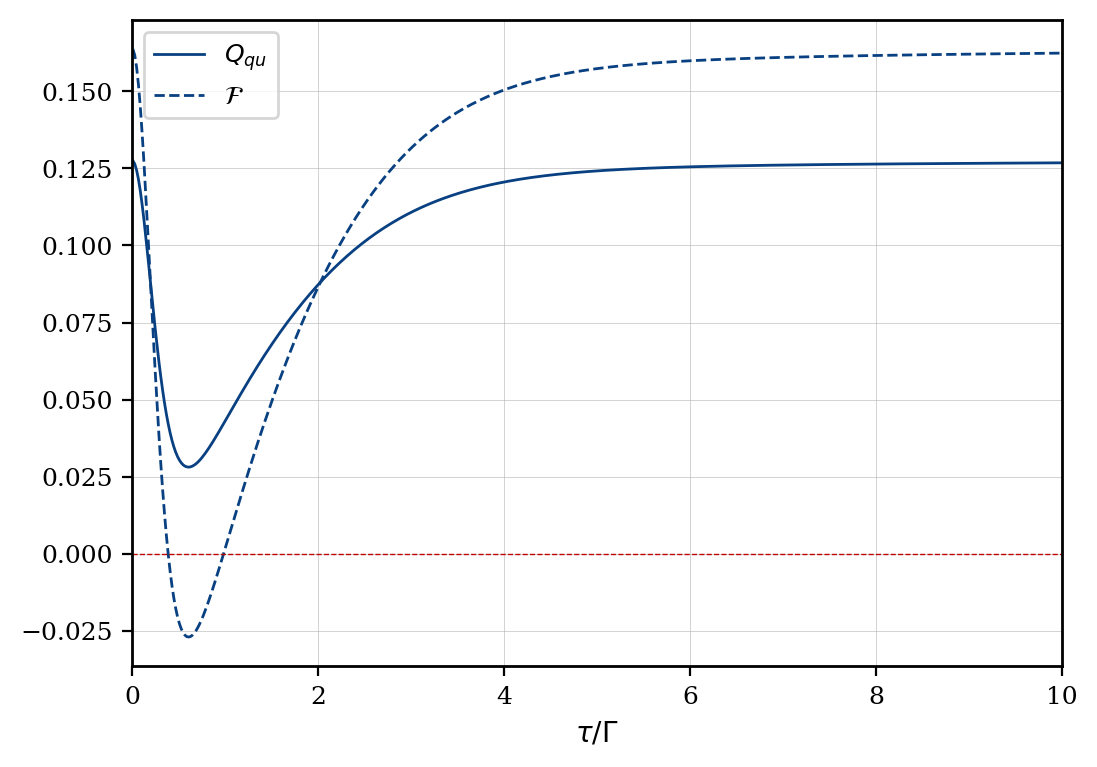

In [34]:
V_fixed = 1
tau_vals = np.linspace(0.01, 10, 500)

# Calcular FTUR para diferentes valores de tau/Gamma
FTUR_tau_vals = []
F_V = []

for tau in tau_vals:
    I_val = I(mu_L(V_fixed), mu_R(V_fixed), T_L, T_R, Gamma, E0, tau)
    noise_val = noise(mu_L(V_fixed), mu_R(V_fixed), T_L, T_L, Gamma, E0, tau)
    J_val_L = J_L(mu_L(V_fixed), mu_R(V_fixed), T_L, T_R, Gamma, E0, tau)
    J_val_R = J_R(mu_L(V_fixed), mu_R(V_fixed), T_L, T_R, Gamma, E0, tau)
    sigma = -(J_val_L / T_L + J_val_R / T_R)
    FTUR_val = noise_val/I_val * np.sinh(sigma/(2*k_B*I_val))-1
    FTUR = (V_fixed * noise_val) / (I_val * k_B * T_L) - 2
    FTUR_tau_vals.append(FTUR_val)
    F_V.append(FTUR)


colorin = cm.get_cmap('GnBu', 4)
colors= colorin(3) 

# Graficar FTUR en función de tau/Gamma
plt.figure(figsize=(6, 4.2))
plt.plot(tau_vals, np.array(FTUR_tau_vals) , color=colors, linewidth=1, linestyle='-', label="$Q_{qu}$")
plt.plot(tau_vals, np.array(F_V), color=colors, linewidth=1, linestyle='--', label="$\mathcal{F}$")
plt.axhline(y=0, color='#BF0000', linestyle='--', linewidth=0.5)
plt.xlabel("$\\tau/\\Gamma$")
plt.legend(loc='best', fontsize=9)
plt.xlim(0, 10)
plt.grid(linewidth=0.2)
plt.show()